In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [87]:
test = np.array(Image.open("cow.jfif"))
test1 = test[:,:,0]
test2 = test[:,:,1]
test3 = test[:,:,2]
dims = test1.shape

In [88]:
def fix(img, n, dims):
    scaler = StandardScaler()
    # newtest = scaler.fit_transform(img)
    newtest = img/255
    flat = newtest
    pca = PCA(n_components = n)
    transform = pca.fit_transform(flat)
    inv = pca.inverse_transform(transform)
    # unscal = scaler.inverse_transform(inv).reshape(dims)
    unscal = inv.reshape(dims)
    return unscal

In [91]:
n = 0.8
color1 = fix(test1, n, dims)
color2 = fix(test2, n, dims)
color3 = fix(test3, n, dims)
newimg = []
for i in range(len(color1)):
    for j in range(len(color1[0])):
        newimg.append((color1[i][j], color2[i][j], color3[i][j]))
newimg = np.array(newimg).reshape(dims[0], dims[1], 3)
        
print(newimg.shape)
print(np.max(test), np.max(newimg))

(187, 270, 3)
255 1.1799028230785087


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


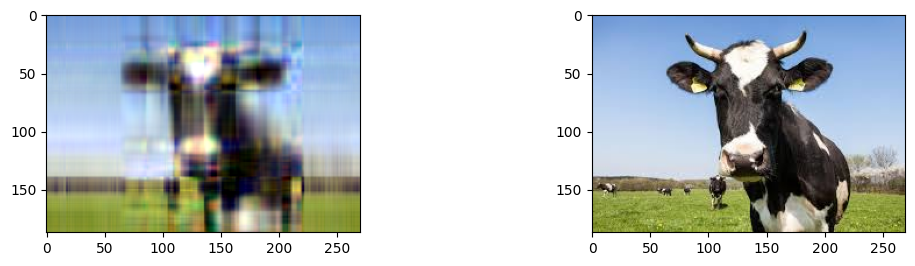

In [92]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(4, 2, 1)
ax.set_title = f"Reduced Image"
ax.imshow(newimg)
ax = fig.add_subplot(4, 2, 2)
ax.set_title = "Orginal Image"
ax.imshow(test)


In [84]:
def MaxPooling(image, dim):
    print(image.shape)
    pooledImg = []
    newRows = len(image[:,:,0])%dim
    newCols = len(image[0,:,0])%dim
    for c in range(len(image[0][0])):
        img = image[:, :, c]
        for row in range(newRows):
            img = np.vstack((img, np.zeros(len(img[0]))))
        for col in range(newCols):
            img = np.hstack((img, np.zeros(len(img)).reshape(-1,1)))
        print(img.shape)
        j = 0
        newImg = []
        while j + dim< len(img[0]):
            i = 0
            row = []
            while i + dim < len(img):
                max = np.max(img[i:i+dim, j:j+dim]) 
                row.append(max)
                i+=1
            newImg.append(row)
            j+=1
        newImg = np.array(newImg)
        pooledImg.append(newImg)
    
    pooledImg = np.array(pooledImg).reshape((len(image) + newRows)//dim, (len(image[0]) + newCols)//dim, len(image[0][0]))
    return pooledImg 

In [85]:
reduced = MaxPooling(test, 2)
plt.imshow(reduced)

(187, 270, 3)
(188, 270)
(188, 270)
(188, 270)


ValueError: cannot reshape array of size 149544 into shape (94,135,3)

In [37]:
uh = np.array([[0,0], [1,1]])
print(uh)
uh = np.hstack((uh, (np.zeros(len(uh)) + 3).reshape(-1,1)))
print(uh)

[[0 0]
 [1 1]]
[[0. 0. 3.]
 [1. 1. 3.]]
